In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {
        'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
        'Windy': [False, True, False, False, False, True, True, False, True, True],
        'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)  # 将数据转换为DataFrame

## 1. 编码

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()
infos = {} 
for k, val in data.items():
    df[k] = le.fit_transform(df[k])
    infos[k] = le.classes_

In [5]:
infos

{'Outlook': array(['Overcast', 'Rainy', 'Sunny'], dtype=object),
 'Temperature': array(['Cool', 'Hot', 'Mild'], dtype=object),
 'Humidity': array(['High', 'Normal'], dtype=object),
 'Windy': array([False,  True]),
 'Play': array(['No', 'Yes'], dtype=object)}

In [14]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,2,1,1,1
7,2,0,0,0,0
8,2,2,1,1,1
9,1,2,1,1,1


In [7]:
X = df.iloc[:, :-1].values  # 获取特征
y = df.iloc[:, -1].values    # 获取标签

In [8]:
X, y

(array([[2, 1, 0, 0],
        [2, 1, 0, 1],
        [0, 1, 0, 0],
        [1, 2, 0, 0],
        [1, 0, 1, 0],
        [1, 0, 1, 1],
        [0, 2, 1, 1],
        [2, 0, 0, 0],
        [2, 2, 1, 1],
        [1, 2, 1, 1]]),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1]))

## 2. 计算熵

In [9]:
_, counts = np.unique(y, return_counts=True)
p = counts / len(y)
-np.sum(p * np.log2(p))

0.9709505944546686

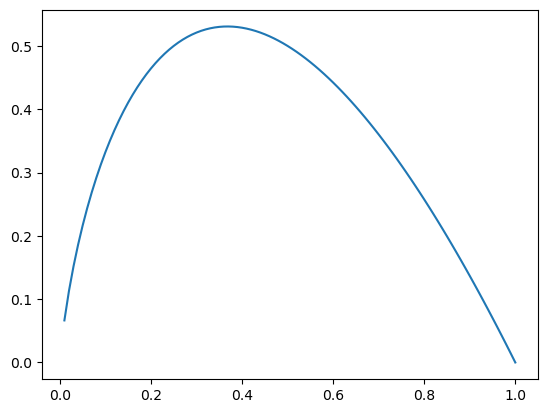

In [10]:
import matplotlib.pyplot as plt

def plogp():
    p = np.linspace(0.01, 1, 100)
    y = - p * np.log2(p)
    plt.plot(p, y)
plogp()

In [11]:
def entropy(y):
    # 计算熵
    value_counts = np.unique(y, return_counts=True)[1]  # 统计每个类别的数量
    probabilities = value_counts / len(y)  # 计算每个类别的概率
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))  # 计算熵，加上小常数避免log(0)

## 3. 计算信息增益

In [12]:
total_entropy = entropy(y)
total_entropy

0.9709505941661296

In [13]:
for feature in range(X.shape[1]):
    print(feature)
    feature_values, feature_counts = np.unique(X[:, feature], return_counts=True)  # 获取特征的所有取值及其计数
    print(feature_values, feature_counts)
    weighted_entropy = 0  # 加权熵初始化
    for value in feature_values:
        subset_y = y[X[:, feature] == value]  # 获取特征取值为当前值的子集的标签
        weighted_entropy += (feature_counts[np.where(feature_values == value)[0][0]] / len(y)) * entropy(subset_y)  # 累加加权熵
    print(total_entropy - weighted_entropy)

0
[0 1 2] [2 4 4]
0.3219280948585085
1
[0 1 2] [3 3 4]
0.4199730939642673
2
[0 1] [5 5]
0.12451124978365313
3
[0 1] [5 5]
0.0


100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 544kB/s]
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 540kB/s]
